In [1]:
import tensorflow as tf
from tensorflow import keras

df=keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = df.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
y_train.shape

(60000,)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

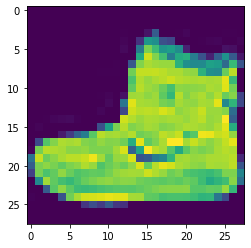

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

### Normalizing 

In [8]:
X_train=X_train/255.0
X_test=X_test/255

**Q1)** Why do we perform the process of Normalization and Standardization?


a.   It makes gradient descent faster, but less accurate <br>
b.   It makes gradient descent faster, and more accurate <br>
c.   It reduces bias between different features which might have existed because of difference in order of magnitude. <br>
d.   It does not affect the accuracy of the model <br>
 (more than one option might be correct) 


**Ans** :  b,c

In [9]:
y_train.dtype

dtype('uint8')

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### ONE HOT ENCODING

In [11]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
num_classes=y_train.shape[1]
num_classes

10

### FITTING MODELS

In [16]:
num_pixels=X_train.shape[1]*X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0],num_pixels).astype(float)
X_test=X_test.reshape(X_test.shape[0],num_pixels).astype(float)

In [20]:
y_train.shape

(60000, 10)

**your next task to build a model with the specifed architechture**

->input layer with relu activation function
->one hidden layer with 128 nodes and relu activation function
->ten output nodes with softmax activation function

Now compile model with optimizer as adam and loss function as categorical crossentropy and metrics as accuracy

In [23]:
from keras.models import Sequential
from keras.layers import Dense
def fit_model():
    model =Sequential()
    model.add(Dense(num_pixels,activation="relu",input_shape=(num_pixels,)))
    model.add(Dense(128,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    model.compile(optimizer="adam" , loss="categorical_crossentropy", metrics=["accuracy"])
    return model

***Training and Testing***

your task is to find the accuracy of the model testing dataset.

In [24]:
model=fit_model()
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 10s - loss: 0.4720 - accuracy: 0.8295 - val_loss: 0.4199 - val_accuracy: 0.8510
Epoch 2/10
1875/1875 - 9s - loss: 0.3574 - accuracy: 0.8678 - val_loss: 0.3910 - val_accuracy: 0.8565
Epoch 3/10
1875/1875 - 10s - loss: 0.3188 - accuracy: 0.8825 - val_loss: 0.3923 - val_accuracy: 0.8566
Epoch 4/10
1875/1875 - 9s - loss: 0.2974 - accuracy: 0.8881 - val_loss: 0.3335 - val_accuracy: 0.8815
Epoch 5/10
1875/1875 - 11s - loss: 0.2793 - accuracy: 0.8954 - val_loss: 0.3477 - val_accuracy: 0.8764
Epoch 6/10
1875/1875 - 10s - loss: 0.2629 - accuracy: 0.9010 - val_loss: 0.3517 - val_accuracy: 0.8746
Epoch 7/10
1875/1875 - 11s - loss: 0.2507 - accuracy: 0.9056 - val_loss: 0.3489 - val_accuracy: 0.8760
Epoch 8/10
1875/1875 - 10s - loss: 0.2394 - accuracy: 0.9090 - val_loss: 0.3486 - val_accuracy: 0.8789
Epoch 9/10
1875/1875 - 10s - loss: 0.2295 - accuracy: 0.9111 - val_loss: 0.3568 - val_accuracy: 0.8871
Epoch 10/10
1875/1875 - 10s - loss: 0.2214 - accuracy: 0.9153 - val_loss: 0

In [25]:
scores

[0.3378051817417145, 0.8898000121116638]

In [29]:
model.save("model_no1.h5")

In [30]:
from keras.models import load_model
trained_modelno1=load_model("model_no1.h5")
trained_modelno1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 717,210
Trainable params: 717,210
Non-trainable params: 0
_________________________________________________________________


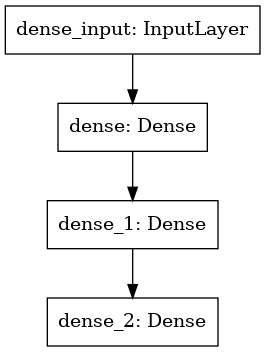

In [31]:
from keras.utils import plot_model
plot_model(trained_modelno1,to_file="model_no1.png")

**Q2)** You will find there is diffence in the training and test accuracy.what steps would you take to reduce this difference?<br>

a) Increase the number of epochs<br>
b) Increase the number of layers<br>
c) Use the technique of dropout<br>
d) Increase the amount of input data(given you have the luxury of generating more data)<br>
 (more than one option might be correct)

**ANS** c d  

**Q3)** One of the important step during neural network implementation is how initial the weights. What rule would give best result when you are initialising a **very deep neural network**?<br>
a) To initialize very small values randomly.<br>
b) To initialize randomly such that the mean of the activations should be zero.<br>
c) To initialize randomly such that the variance of the activations should stay the same across every layer.<br>
d) To initialize very big values randomly<br>
(more than one option might be correct)


**ANS** b, c